In [2]:
cd 'G:\Kaggle\Titanic'

G:\Kaggle\Titanic


In [256]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

In [276]:
total =  pd.read_csv('train.csv')
total.shape

(891, 12)

In [277]:
total.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

In [278]:
total.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [279]:
def get_title():
    
    global train
    total['title'] = total['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())
    title_dict = { "Capt":       "Officer",
               "Col":        "Officer",
               "Major":      "Officer",
               "Jonkheer":   "Royalty",
               "Don":        "Royalty",
               "Sir" :       "Royalty",
               "Dr":         "Officer",
               "Rev":        "Officer",
               "the Countess":"Royalty",
               "Dona":       "Royalty",
               "Mme":        "Mrs",
               "Mlle":       "Miss",
               "Ms":         "Mrs",
               "Mr" :        "Mr",
               "Mrs" :       "Mrs",
               "Miss" :      "Miss",
               "Master" :    "Master",
               "Lady" :      "Royalty"}
    total['title'] = total['title'].map(title_dict)
    
get_title()

In [280]:
total.notnull().sum()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
title          891
dtype: int64

In [281]:
grouped = total.groupby(['Sex', 'Pclass', 'title'])['Age']
grouped.median()

Sex     Pclass  title  
female  1       Miss       30.0
                Mrs        40.0
                Officer    49.0
                Royalty    40.5
        2       Miss       24.0
                Mrs        31.5
        3       Miss       18.0
                Mrs        31.0
male    1       Master      4.0
                Mr         40.0
                Officer    51.0
                Royalty    40.0
        2       Master      1.0
                Mr         31.0
                Officer    46.5
        3       Master      4.0
                Mr         26.0
Name: Age, dtype: float64

In [282]:
def fill_age(df):
    
    if df['Sex' == 'female']:
        
        if df['Pclass' == 1]:
            
            if df['title' == 'Miss']:
                return 30
            elif df['title' == 'Mrs']:
                return 45
            elif df['title' == 'Officer']:
                return 49
            elif df['title' == 'Royalty']:
                return 39
            
        elif df['Pclass' == 2]:
            
            if df['title' == 'Miss']:
                return 20
            elif df['title' == 'Mrs']:
                return 30
            
        elif df['Pclass' == 3]:
            
            if df['title' == 'Miss']:
                return 18
            elif df['title' == 'Mrs']:
                return 31
        
    if df['Sex' == 'male']:
        
        if df['Pclass' == 1]:
            
            if df['title' == 'Master']:
                return 6
            elif df['title' == 'Mr']:
                return 41.5
            elif df['title' == 'Officer']:
                return 52
            elif df['title' == 'Royalty']:
                return 40
            
        elif df['Pclass' == 2]:
            
            if df['title' == 'Master']:
                return 2
            elif df['title' == 'Mr']:
                return 30
            elif df['title' == 'Officer']:
                return 41.5
            
            
        elif df['Pclass' == 3]:
            
            if df['title' == 'Master']:
                return 6
            elif df['title' == 'Mr']:
                return 26
   
total.Age = total.apply(lambda r : fill_age(r) if np.isnan(r['Age']) else r['Age'], axis=1)

In [283]:
total['Cabin'].fillna('U', inplace = True)
total['Cabin'] = total['Cabin'].map(lambda s: s[0])

In [284]:
print total['Embarked'].mode()
total['Embarked'].fillna('S', inplace = True)

0    S
dtype: object


In [266]:
sex_dict = {'male' : 1, 'female' : 0}
total['Sex'] = total['Sex'].map(sex_dict)

In [267]:
total['family_size'] = total['SibSp'] + total['Parch'] + 1 

In [268]:
total.family_size.value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: family_size, dtype: int64

In [269]:
total['Single'] = total['family_size'].map(lambda s : 1 if s==1 else 0)
total['small_family'] = total['family_size'].map(lambda s : 1 if 1<s<5 else 0)
total['large_family'] = total['family_size'].map(lambda s : 1 if 4<s else 0)

In [270]:
total.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
title           0
family_size     0
Single          0
small_family    0
large_family    0
dtype: int64

In [271]:
# submission = pd.DataFrame(total)
# submission.to_csv("total_formated.csv", index=False)

In [231]:
total_passengerid = total['PassengerId']
total_survived = total['Survived']

total.drop(['PassengerId', 'Survived', 'Ticket','Name'], axis = 1, inplace = True)

In [232]:
total = pd.get_dummies(total, columns=['Cabin', 'Embarked', 'title', 'Pclass'])

In [233]:
total.shape

(891, 30)

In [234]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(total, total_survived, random_state=4, test_size = 0.2, stratify = total_survived )
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((712, 30), (179, 30), (712L,), (179L,))

In [235]:
Y_test.value_counts()

0    110
1     69
Name: Survived, dtype: int64

In [236]:
# from scipy.stats import boxcox
# # X_train['Fare'], lam = boxcox(X_train['Fare']+0.001)
# X_test['Fare'], lam = boxcox(X_test['Fare']+0.001)
# X_test.Fare.skew()

In [237]:
Y_train.value_counts()

0    439
1    273
Name: Survived, dtype: int64

In [238]:
Y_test.value_counts()

0    110
1     69
Name: Survived, dtype: int64

In [239]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.cross_validation import cross_val_score

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [240]:
clf = ExtraTreesClassifier(n_estimators=200)
clf = clf.fit(X_train, Y_train)

In [241]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
feat_labels = X_train.columns
for f in range(X_train.shape[1]):
              print("%2d)  %-*s %f" % (f +1, 6,
                                      feat_labels[f],
                                      importances[indices[f]]))

 1)  Sex    0.197493
 2)  Age    0.169455
 3)  SibSp  0.124338
 4)  Parch  0.119287
 5)  Fare   0.043786
 6)  family_size 0.037834
 7)  Single 0.037424
 8)  small_family 0.035677
 9)  large_family 0.023014
10)  Cabin_A 0.021127
11)  Cabin_B 0.019308
12)  Cabin_C 0.018538
13)  Cabin_D 0.018460
14)  Cabin_E 0.016506
15)  Cabin_F 0.013470
16)  Cabin_G 0.012965
17)  Cabin_T 0.012679
18)  Cabin_U 0.012443
19)  Embarked_C 0.011531
20)  Embarked_Q 0.010033
21)  Embarked_S 0.008694
22)  title_Master 0.008009
23)  title_Miss 0.007148
24)  title_Mr 0.006701
25)  title_Mrs 0.006400
26)  title_Officer 0.002934
27)  title_Royalty 0.002037
28)  Pclass_1 0.001249
29)  Pclass_2 0.001057
30)  Pclass_3 0.000400


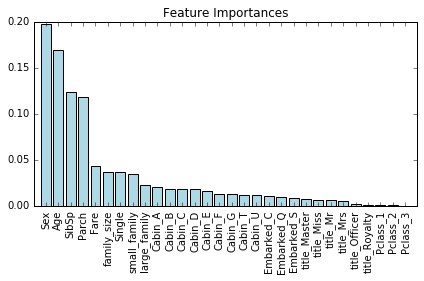

In [242]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
       importances[indices],
        color = 'lightblue',
        align='center')
plt.xticks(range(X_train.shape[1]),
          feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[-1]])
plt.tight_layout()
plt.show()

In [243]:
######################################################

In [244]:
# Load libraries
import pandas
import numpy
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [245]:
# Evaluate Algorithms: Baseline

# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'


# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

LR: 0.830164 (0.050325)
LDA: 0.825939 (0.051904)
KNN: 0.738772 (0.033882)
CART: 0.772359 (0.035508)
NB: 0.797809 (0.040045)
SVM: 0.731788 (0.033157)


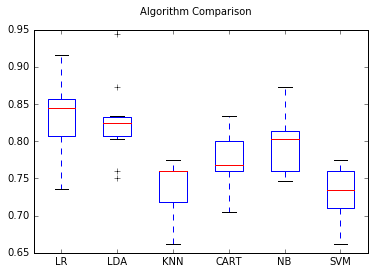

In [246]:
results = []
names = []
for name, model in models:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

ScaledLR: 0.823122 (0.040720)
ScaledLDA: 0.825939 (0.051904)
ScaledKNN: 0.804773 (0.035179)
ScaledCART: 0.766745 (0.037905)
ScaledNB: 0.709194 (0.093827)
ScaledSVM: 0.827328 (0.046653)


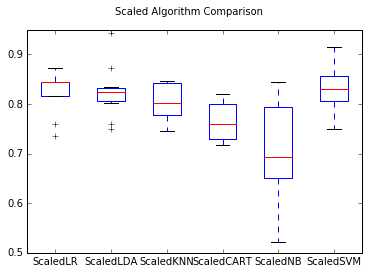

In [247]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))

results = []
names = []

for name, model in pipelines:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [248]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']

param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()

kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

for params, mean_score, scores in grid_result.grid_scores_:
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

Best: 0.832865 using {'kernel': 'rbf', 'C': 0.3}
0.824511 (0.045554) with: {'kernel': 'linear', 'C': 0.1}
0.730399 (0.054107) with: {'kernel': 'poly', 'C': 0.1}
0.820344 (0.040970) with: {'kernel': 'rbf', 'C': 0.1}
0.616784 (0.090963) with: {'kernel': 'sigmoid', 'C': 0.1}
0.824511 (0.045554) with: {'kernel': 'linear', 'C': 0.3}
0.811835 (0.044294) with: {'kernel': 'poly', 'C': 0.3}
0.832942 (0.044278) with: {'kernel': 'rbf', 'C': 0.3}
0.616784 (0.090963) with: {'kernel': 'sigmoid', 'C': 0.3}
0.824511 (0.045554) with: {'kernel': 'linear', 'C': 0.5}
0.818877 (0.047877) with: {'kernel': 'poly', 'C': 0.5}
0.831534 (0.043641) with: {'kernel': 'rbf', 'C': 0.5}
0.616784 (0.090963) with: {'kernel': 'sigmoid', 'C': 0.5}
0.824511 (0.045554) with: {'kernel': 'linear', 'C': 0.7}
0.828697 (0.043716) with: {'kernel': 'poly', 'C': 0.7}
0.830145 (0.045933) with: {'kernel': 'rbf', 'C': 0.7}
0.616784 (0.090963) with: {'kernel': 'sigmoid', 'C': 0.7}
0.824511 (0.045554) with: {'kernel': 'linear', 'C': 0.9

AB: 0.821674 (0.029088)
GBM: 0.827347 (0.041271)
RF: 0.797809 (0.043412)
ET: 0.778071 (0.049156)


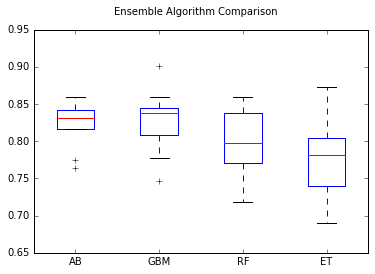

In [249]:
# Ensemble Methods
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [252]:
# Finalize Model

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5, kernel='poly')
model.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset
rescaledtestX = scaler.transform(X_test)
predictions = model.predict(rescaledtestX)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.815642458101
[[99 11]
 [22 47]]
             precision    recall  f1-score   support

          0       0.82      0.90      0.86       110
          1       0.81      0.68      0.74        69

avg / total       0.82      0.82      0.81       179



In [253]:
# Tune scaled Logistic regression
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

c_values = [0.001, 0.01, 0.1, 1]
Penalty = ['l1', 'l2']
class_weight = ['balanced']

param_grid = dict(C = c_values, penalty = Penalty, class_weight = class_weight)
model = LogisticRegression()

kfold = cross_validation.KFold(n = num_instances, n_folds = num_folds, random_state = seed)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

for params, mean_score, scores in grid_result.grid_scores_:
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

Best: 0.825843 using {'penalty': 'l1', 'C': 0.1, 'class_weight': 'balanced'}
0.616784 (0.090963) with: {'penalty': 'l1', 'C': 0.001, 'class_weight': 'balanced'}
0.789280 (0.045556) with: {'penalty': 'l2', 'C': 0.001, 'class_weight': 'balanced'}
0.779577 (0.038803) with: {'penalty': 'l1', 'C': 0.01, 'class_weight': 'balanced'}
0.823063 (0.042121) with: {'penalty': 'l2', 'C': 0.01, 'class_weight': 'balanced'}
0.825900 (0.044166) with: {'penalty': 'l1', 'C': 0.1, 'class_weight': 'balanced'}
0.825880 (0.041612) with: {'penalty': 'l2', 'C': 0.1, 'class_weight': 'balanced'}
0.825880 (0.041612) with: {'penalty': 'l1', 'C': 1, 'class_weight': 'balanced'}
0.825880 (0.041612) with: {'penalty': 'l2', 'C': 1, 'class_weight': 'balanced'}


In [254]:
# Finalize Model

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = LogisticRegression(penalty = 'l1', C = 0.1, class_weight = 'balanced')
model.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset
rescaledtestX = scaler.transform(X_test)
predictions = model.predict(rescaledtestX)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.804469273743
[[89 21]
 [14 55]]
             precision    recall  f1-score   support

          0       0.86      0.81      0.84       110
          1       0.72      0.80      0.76        69

avg / total       0.81      0.80      0.81       179



In [208]:
# Random Forest Tuning
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold

forest = RandomForestClassifier(max_features='sqrt')

parameter_grid = {
                 'max_depth' : [4,5,6,7,8],
                 'n_estimators': [50,100,200,500, 1000],
                 'criterion': ['gini','entropy']
                 }

cross_validation = StratifiedKFold(Y_train, n_folds=10, random_state = 42)
grid_search = GridSearchCV(forest,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(X_train, Y_train)

GridSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[0 0 ..., 0 0], n_folds=10, shuffle=False, random_state=42),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 100, 200, 500, 1000], 'criterion': ['gini', 'entropy'], 'max_depth': [4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [209]:
print ('Best Score: {}'.format(grid_search.best_score_))
print ('Best Parameters: {}'.format(grid_search.best_params_))
print ('Best estimator: {}'.format(grid_search.best_estimator_))

Best Score: 0.827247191011
Best Parameters: {'n_estimators': 50, 'criterion': 'gini', 'max_depth': 5}
Best estimator: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [210]:
# prepare the model
model = RandomForestClassifier(class_weight='balanced', criterion='entropy',
max_depth=6, max_features='sqrt', max_leaf_nodes=None,
                               min_samples_leaf=1, min_samples_split=2,
                               min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                               oob_score=False, random_state=None, verbose=0, warm_start=False)
model.fit(X_train, Y_train)

# estimate accuracy on validation dataset
predictions = model.predict(X_test)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.854748603352
[[108  11]
 [ 15  45]]
             precision    recall  f1-score   support

          0       0.88      0.91      0.89       119
          1       0.80      0.75      0.78        60

avg / total       0.85      0.85      0.85       179



In [ ]:
from sklearn.metrics import roc_auc_score
metrics.roc_auc_score(Y_test, Y_pred_prob)